In [1]:
import librosa.display
import librosa
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy.signal import medfilt

In [3]:
path = '/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/'

In [4]:
#path_pieces = '../vocaldetection/vocal_pieces.json'
SPLITS = 'split_train_test_10.json'

In [5]:
train_files = []
test_files = []
with open(SPLITS) as json_file:  
    data = json.load(json_file)
#print (data)
    for spl in range(len(data)):
        train_files.append([])
        test_files.append([])
        # Load train data
        for music in data[spl]['train']:
            train_files[spl].append(music)
        #    print (music)

        # Load test data
        #print ('Test data')
        for music in data[spl]['test']:
            test_files[spl].append(music)

In [6]:
# Calculando apenas o primeiro split!
dict_rms = {}
for piece in train_files[0]+test_files[0]:
    print (piece)
    separated_vocals_path = path+piece+'_MIX/'+'vocals.wav'
    print (separated_vocals_path)
    y, sr = librosa.load(separated_vocals_path)
    print (sr)
    
    dict_rms[piece] = librosa.feature.rms(y=y, frame_length=2205, hop_length=441)
    

AClassicEducation_NightOwl
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/AClassicEducation_NightOwl_MIX/vocals.wav
22050
AimeeNorwich_Child
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/AimeeNorwich_Child_MIX/vocals.wav
22050
AlexanderRoss_GoodbyeBolero
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/AlexanderRoss_GoodbyeBolero_MIX/vocals.wav
22050
AlexanderRoss_VelvetCurtain
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/AlexanderRoss_VelvetCurtain_MIX/vocals.wav
22050
Auctioneer_OurFutureFaces
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/Auctioneer_OurFutureFaces_MIX/vocals.wav
22050
BigTroubles_Phantom
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/BigTroubles_Phantom_MIX/vocals.wav
22050
BrandonWebster_DontHearAThing
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/BrandonWebster_DontHearAThing_MIX/vocals.wav
22050
BrandonWebster_YesSirICanFly
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/BrandonWebst

In [7]:
# pular
dict_rms

{'AClassicEducation_NightOwl': array([[6.7458604e-03, 1.5019634e-02, 2.9982042e-02, ..., 4.4552289e-07,
         4.3582287e-11, 0.0000000e+00]], dtype=float32),
 'AimeeNorwich_Child': array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 'AlexanderRoss_GoodbyeBolero': array([[0.00052426, 0.00058009, 0.00079074, ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 'AlexanderRoss_VelvetCurtain': array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 'Auctioneer_OurFutureFaces': array([[3.3249130e-06, 9.7380962e-06, 1.1202559e-05, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00]], dtype=float32),
 'BigTroubles_Phantom': array([[2.3105646e-05, 2.7033537e-05, 3.7972528e-05, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00]], dtype=float32),
 'BrandonWebster_DontHearAThing': array([[0.00014774, 0.00018563, 0.0002127 , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 'BrandonWebster_YesSirICanFly': array([[6.6508874e-05, 5.2210075e-05,

In [8]:
# pular
rms = dict_rms['AimeeNorwich_Child']

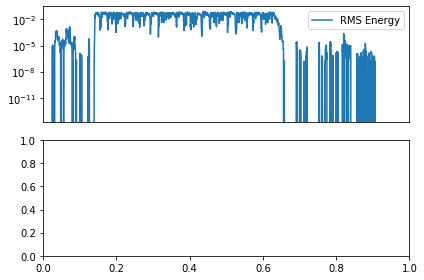

In [104]:
# pular
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(2, 1, 1)
plt.semilogy(rms.T, label='RMS Energy')
plt.xticks([])
plt.xlim([0, rms.shape[-1]])
plt.legend(loc='best')
plt.subplot(2, 1, 2)
#librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
#                         y_axis='log', x_axis='time')
#plt.title('log Power spectrogram')
plt.tight_layout()

In [9]:
SPLITS

'split_train_test_10.json'

In [7]:
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])[0]

# Find optimal probability threshold
# threshold = Find_Optimal_Cutoff(y_train, X_train)
# print (threshold)

In [8]:
from tqdm import tqdm_notebook as tqdm
import pandas as pd
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve, precision_recall_curve, auc, f1_score, accuracy_score
    
import numpy as np
from sklearn.metrics import precision_recall_fscore_support


In [9]:
labels_path = '/media/DISCO2TB/datasets/MedleyDB/Features/'

final_tsh = []
rows_list = []


for split in tqdm(range(10)):
    if split == 8:
        continue
    X_train, y_train = [], []
    X_test, y_test = [], []

    dict_lbl = {}
    for piece in train_files[split]:  
        dict_lbl[piece] = np.load(labels_path+piece+'_labels_20ms.npy')
        if len(dict_lbl[piece]) < len(dict_rms[piece][0]):
            complete = [0] * (len(dict_rms[piece][0])-len(dict_lbl[piece]))
            dict_lbl[piece] = dict_lbl[piece].tolist() + complete

        X_train.append(dict_rms[piece][0])
        y_train.append(dict_lbl[piece])


    X_train = np.concatenate(X_train)
    y_train = np.concatenate(y_train)

    print (max(X_train),np.mean(X_train),min(X_train))

    print ('train', len(X_train), len(y_train))
   
    # Find the optimal threshold
    fpr, tpr, thresholds = roc_curve(y_train, X_train)
    precision, recall, thresholds = precision_recall_curve(y_train, X_train)
    roc_auc = auc(fpr, tpr)

    # Threshold ótimo: specificity + sensibility - 1
    #tsh_optimal = max((1-fpr)+tpr-1)
    
    # Qual deles está correto????
    optimal_idx = np.argmax(abs(tpr - fpr))
    print ('sizes', len(tpr), len(fpr), len(thresholds))
    optimal_threshold = thresholds[optimal_idx]

    # Find optimal probability threshold
    #threshold = Find_Optimal_Cutoff(y_train, X_train)

    tsh_optimal = optimal_threshold
    print (tsh_optimal)
    
    final_tsh.append(tsh_optimal)
    
    
    # Evaluate test pieces
    for piece in test_files[split]:  
        dict_lbl[piece] = np.load(labels_path+piece+'_labels_20ms.npy')
        if len(dict_lbl[piece]) < len(dict_rms[piece][0]):
            complete = [0] * (len(dict_rms[piece][0])-len(dict_lbl[piece]))
            dict_lbl[piece] = dict_lbl[piece].tolist() + complete

        X_test = dict_rms[piece][0]
        y_test = dict_lbl[piece]
        
        y_true = y_test

        normalized = X_test
        normalized[normalized > tsh_optimal] = 1
        normalized[normalized <= tsh_optimal] = 0

        y_pred = normalized

        target_names = ['absent', 'present']
        #print(classification_report(y_true, y_pred, target_names=target_names))
    
        acc = accuracy_score(y_true, y_pred)
        P, R, F1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
        rows_list.append({'split':split,
                          'piece':piece,
                          'threshold':tsh_optimal,
                          'ACC':acc,
                          'P':P,'R':R,'F1':F1})

0.48090294 0.049699627 0.0
train 442558 442558
sizes 62112 62112 388956
9.351041e-06
1.0 0.23909904 0.0
train 427587 427587
sizes 37714 37714 280103
6.142794e-06
1.0 0.39530316 0.0
train 401668 401668
sizes 28179 28179 210238
1.0311902e-05
1.0 0.6060344 0.0
train 374465 374465
sizes 14980 14980 106994
9.248293e-06
1.0 0.65556824 0.0
train 491966 491966
sizes 12580 12580 88803
8.421104e-06
1.0 0.822221 0.0
train 359478 359478
sizes 85 85 1441
1.0059153e-05
1.0 0.81523496 0.0
train 435508 435508
sizes 85 85 1441
1.0059153e-05
1.0 0.82355046 0.0
train 471266 471266
sizes 85 85 1441
1.0059153e-05
1.0 0.8270316 0.0
train 409200 409200
sizes 85 85 1441
1.0059153e-05



In [10]:
results_rf = pd.DataFrame(rows_list)

In [11]:
results_rf[results_rf.split == 5]

,split,piece,threshold,ACC,P,R,F1
90,5,Auctioneer_OurFutureFaces,0.00001,0.647234,0.624667,1.000000,0.768979
91,5,AvaLuna_Waterduct,0.00001,0.645226,0.581590,1.000000,0.735450
92,5,BigTroubles_Phantom,0.00001,0.674425,0.667415,0.995606,0.799127
93,5,ClaraBerryAndWooldog_AirTraffic,0.00001,0.966217,0.965047,0.993976,0.979298
94,5,ClaraBerryAndWooldog_Boys,0.00001,0.884285,0.870042,1.000000,0.930506
95,5,ClaraBerryAndWooldog_Stella,0.00001,0.954332,0.965635,0.970735,0.968178
96,5,ClaraBerryAndWooldog_TheBadGuys,0.00001,0.910797,0.889387,0.999890,0.941407
97,5,ClaraBerryAndWooldog_WaltzForMyVictims,0.00001,0.945736,0.916596,0.947568,0.931825
98,5,Debussy_LenfantProdigue,0.00001,0.955265,0.964728,0.984573,0.974550
99,5,DreamersOfTheGhetto_HeavyLove,0.00001,0.886644,0.882158,0.977264,0.927279


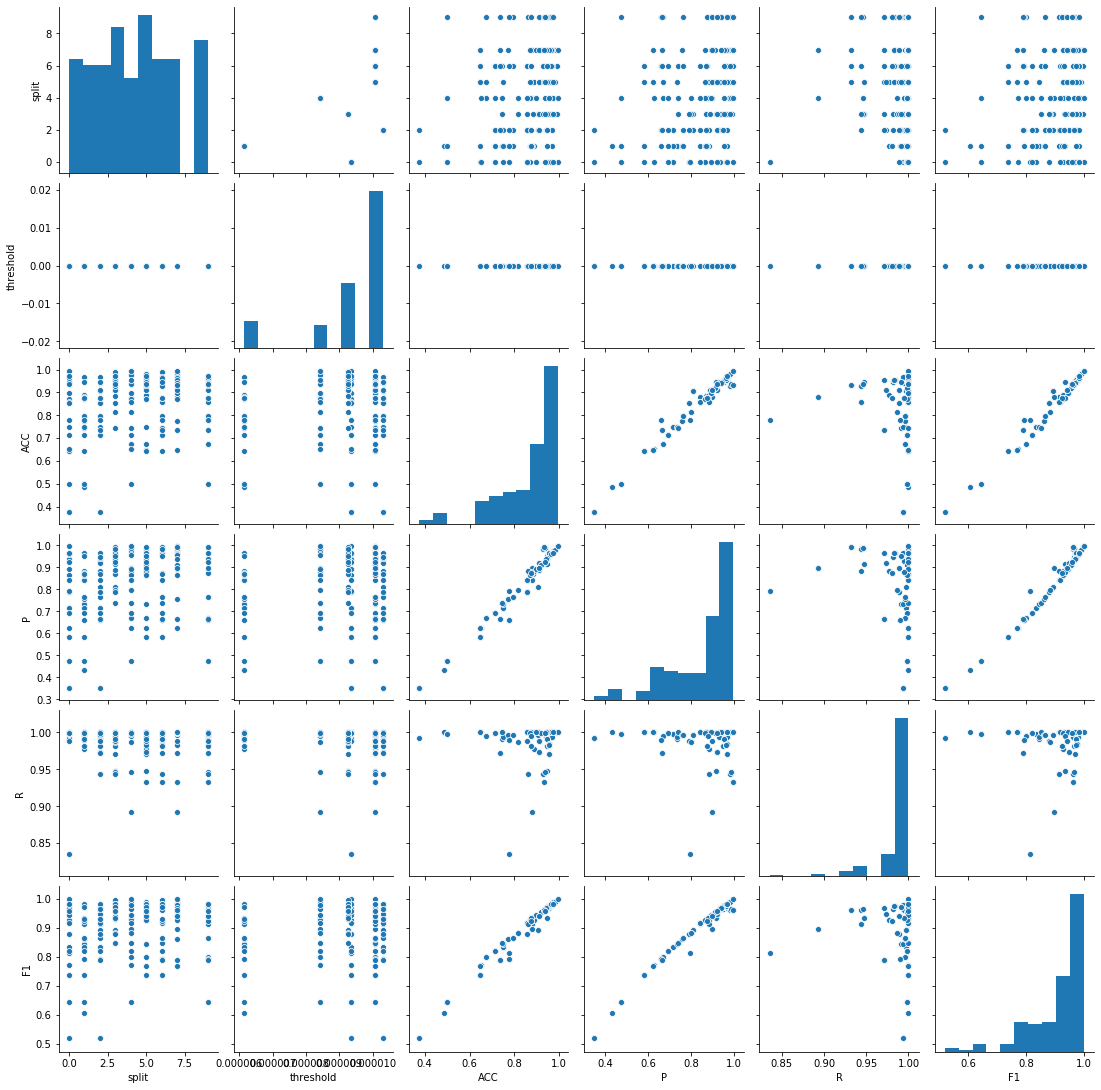

In [12]:
sns.pairplot(data=results_rf)

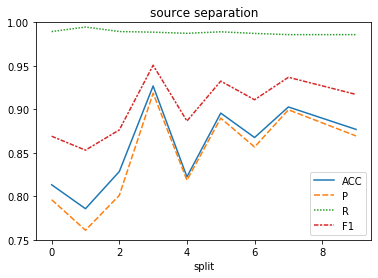

In [17]:
plt.title('source separation')
g = sns.lineplot(data=results_rf[['ACC','P','R','F1','split']].groupby('split').mean())
g.set(ylim=(0.75,1))
plt.show()

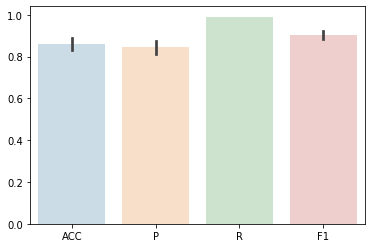

In [20]:
# Show each observation with a scatterplot
sns.barplot(
              data=results_rf[['ACC','P','R','F1','split']].groupby('split').mean(), dodge=True, alpha=.25, zorder=1)

In [13]:
# final_tsh = np.mean(final_tsh)
# final_tsh

# Mesma coisa que anteriormente, mas agora passando um filtro da mediana

In [12]:
labels_path = '/media/DISCO2TB/datasets/MedleyDB/Features/'

final_tsh = []
rows_list = []


for split in tqdm(range(10)):
    if split == 8:
        continue
    X_train, y_train = [], []
    X_test, y_test = [], []

    dict_lbl = {}
    for piece in train_files[split]:  
        dict_lbl[piece] = np.load(labels_path+piece+'_labels_20ms.npy')
        if len(dict_lbl[piece]) < len(dict_rms[piece][0]):
            complete = [0] * (len(dict_rms[piece][0])-len(dict_lbl[piece]))
            dict_lbl[piece] = dict_lbl[piece].tolist() + complete

        X_train.append(medfilt(dict_rms[piece][0],51))
        y_train.append(dict_lbl[piece])


    X_train = np.concatenate(X_train)
    y_train = np.concatenate(y_train)

    print (max(X_train),np.mean(X_train),min(X_train))

    print ('train', len(X_train), len(y_train))
   
    # Find the optimal threshold
    fpr, tpr, thresholds = roc_curve(y_train, X_train)
    precision, recall, thresholds = precision_recall_curve(y_train, X_train)
    roc_auc = auc(fpr, tpr)

    # Threshold ótimo: specificity + sensibility - 1
    #tsh_optimal = max((1-fpr)+tpr-1)
    
    # Qual deles está correto????
    optimal_idx = np.argmax(abs(tpr - fpr))
    print ('sizes', len(tpr), len(fpr), len(thresholds))
    optimal_threshold = thresholds[optimal_idx]

    # Find optimal probability threshold
    #threshold = Find_Optimal_Cutoff(y_train, X_train)

    tsh_optimal = optimal_threshold
    print (tsh_optimal)
    
    final_tsh.append(tsh_optimal)
    
    
    # Evaluate test pieces
    for piece in test_files[split]:  
        dict_lbl[piece] = np.load(labels_path+piece+'_labels_20ms.npy')
        if len(dict_lbl[piece]) < len(dict_rms[piece][0]):
            complete = [0] * (len(dict_rms[piece][0])-len(dict_lbl[piece]))
            dict_lbl[piece] = dict_lbl[piece].tolist() + complete

        X_test = dict_rms[piece][0]
        y_test = dict_lbl[piece]
        
        y_true = y_test

        normalized = X_test
        normalized[normalized > tsh_optimal] = 1
        normalized[normalized <= tsh_optimal] = 0

        y_pred = normalized

        target_names = ['absent', 'present']
        #print(classification_report(y_true, y_pred, target_names=target_names))
    
        acc = accuracy_score(y_true, y_pred)
        P, R, F1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
        rows_list.append({'split':split,
                          'piece':piece,
                          'threshold':tsh_optimal,
                          'ACC':acc,
                          'P':P,'R':R,'F1':F1})

0.3386200964450836 0.049049588206839724 0.0
train 442558 442558
sizes 97474 97474 193287
0.009796715341508389
1.0 0.18930524101749407 0.0
train 427587 427587
sizes 67879 67879 136055
0.012034242041409016
1.0 0.28209724918684187 0.0
train 401668 401668
sizes 51023 51023 102297
0.019157296046614647
1.0 0.39958928321398146 0.0
train 374465 374465
sizes 26410 26410 51005
0.016154902055859566
1.0 0.4626579016317494 0.0
train 491966 491966
sizes 21840 21840 43130
0.015113369561731815
1.0 0.5595412633559278 0.0
train 359478 359478
sizes 284 284 643
0.015363753773272038
1.0 0.5574863705572853 0.0
train 435508 435508
sizes 284 284 643
0.015363753773272038
1.0 0.5706453982860258 0.0
train 471266 471266
sizes 284 284 643
0.015363753773272038
1.0 0.568176378955675 0.0
train 409200 409200
sizes 284 284 643
0.015363753773272038



In [13]:
results_rf = pd.DataFrame(rows_list)

In [19]:
results_rf[results_rf.split == 2]

,split,piece,threshold,ACC,P,R,F1
35,2,AlexanderRoss_GoodbyeBolero,0.019157,0.907407,0.999838,0.761359,0.864453
36,2,AlexanderRoss_VelvetCurtain,0.019157,0.664606,0.998822,0.519677,0.683655
37,2,BrandonWebster_DontHearAThing,0.019157,0.743796,0.911346,0.778798,0.839875
38,2,CelestialShore_DieForUs,0.019157,0.627243,0.471195,0.832838,0.601870
39,2,HezekiahJones_BorrowedHeart,0.019157,0.677457,1.000000,0.608127,0.756317
40,2,HopAlong_SisterCities,0.019157,0.930073,0.994816,0.892266,0.940754
41,2,InvisibleFamiliars_DisturbingWildlife,0.019157,0.746411,0.973878,0.689672,0.807497
42,2,Meaxic_TakeAStep,0.019157,0.858022,0.945593,0.830756,0.884463
43,2,Meaxic_YouListen,0.019157,0.909236,1.000000,0.787256,0.880966
44,2,MusicDelta_80sRock,0.019157,0.866197,1.000000,0.853412,0.920909


In [15]:
import seaborn as sns

(-2, 11)

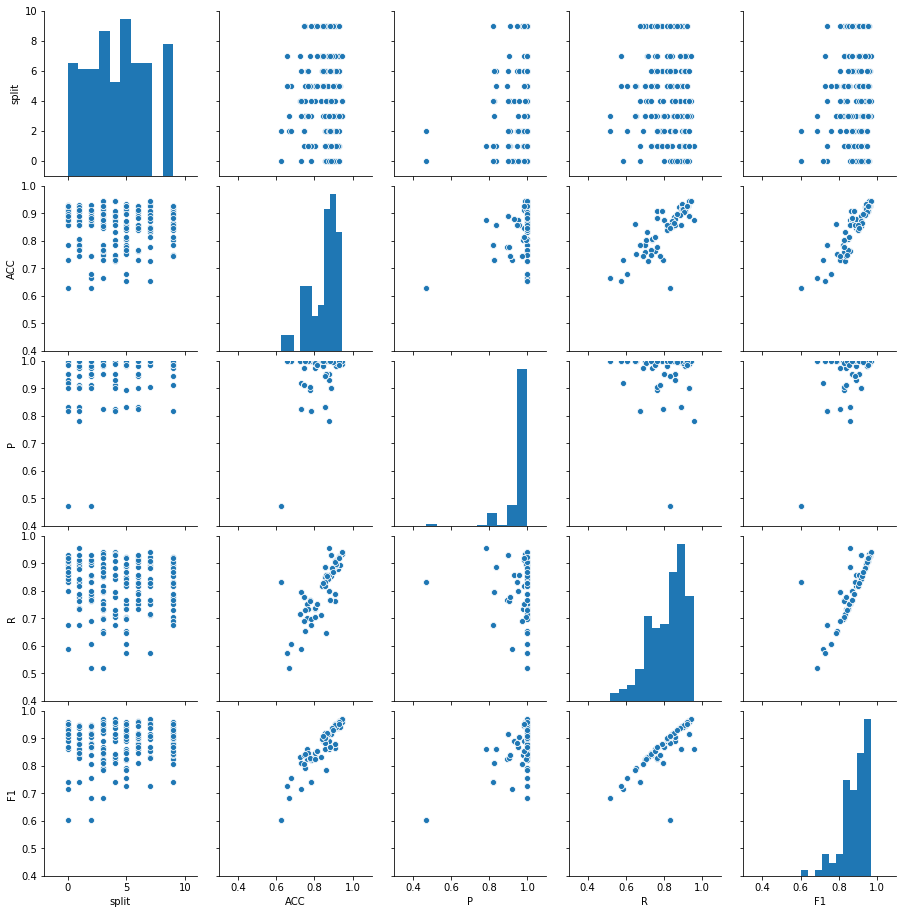

In [24]:
g = sns.pairplot(data=results_rf[['split','piece','ACC','P','R','F1']])
g.set(ylim=(0.4,1))
g.set(xlim=(0.3,1.1))
g.axes[0,0].set_ylim((-1,10))
g.axes[0,0].set_xlim((-2,11))

In [14]:
final_tsh

[9.351041e-06,
 6.142794e-06,
 1.0311902e-05,
 9.248293e-06,
 8.421104e-06,
 1.0059153e-05,
 1.0059153e-05,
 1.0059153e-05,
 1.0059153e-05]

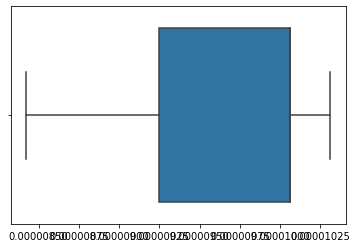

In [15]:
sns.boxplot(final_tsh, showfliers=False)

In [30]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

In [47]:
optimal_idx = np.argmax(tpr - (1-fpr))
optimal_threshold = thresholds[optimal_idx]

In [48]:
optimal_threshold

0.00022332784

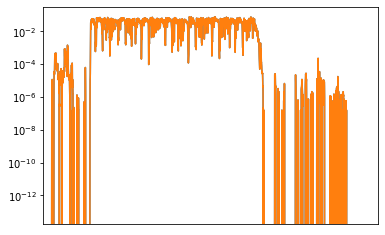

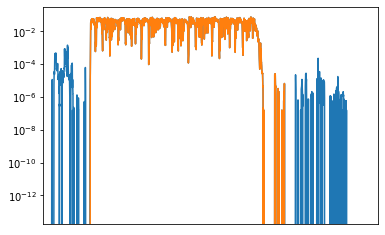

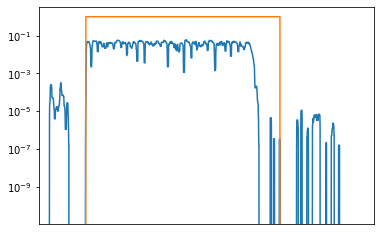

In [109]:
plt.plot(dict_rms[piece][0][:-1])
plt.semilogy(dict_rms[piece][0][:-1], label='RMS Energy')
plt.xticks([])
plt.xlim([0, rms.shape[-1]])
plt.show()
plt.plot(dict_rms[piece][0][:-1])
plt.semilogy(dict_lbl[piece]*dict_rms[piece][0][:-1], label='RMS Energy')
plt.xticks([])
plt.xlim([0, rms.shape[-1]])
plt.show()
plt.plot(medfilt(dict_rms[piece][0][:-1],51))
plt.semilogy(dict_lbl[piece], label='RMS Energy')
plt.xticks([])
plt.xlim([0, rms.shape[-1]])
plt.show()

In [71]:
#Normalized Data
x = X_test
normalized = (x-min(x))/(1-min(x))

In [72]:
normalized

array([2.4438222e-04, 3.3414186e-04, 5.5110606e-04, ..., 1.0222070e-05,
       1.4475815e-05, 1.5191130e-05], dtype=float32)

In [73]:
max(normalized)

0.5967864

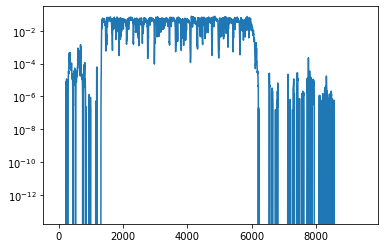

In [112]:
plt.plot(normalized)
plt.yscale('log')

In [42]:
len(y_test), len(X_test)

(18, 18)

In [109]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, f1_score

fpr, tpr, thresholds = roc_curve(y_train, X_train.T)
precision, recall, thresholds = precision_recall_curve(y_train, X_train.T)
roc_auc = auc(fpr, tpr)

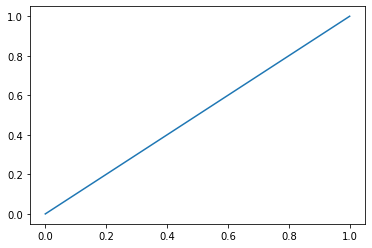

In [110]:
plt.plot(thresholds)

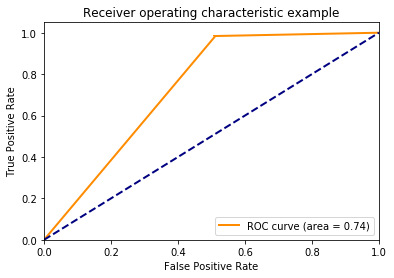

In [14]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [41]:
tpr

array([0.00000000e+00, 3.16429661e-06, 9.93589135e-04, ...,
       9.91456399e-01, 9.91462728e-01, 1.00000000e+00])

Logistic: f1=0.884 auc=0.980


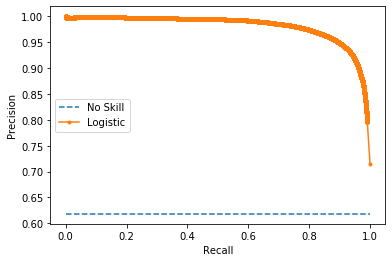

In [104]:
normalized = X_train.T
normalized[normalized > 10e-3] = 1
normalized[normalized <= 10e-3] = 0
lr_f1, lr_auc = f1_score(y_train, normalized), auc(recall, precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = sum(y_test) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [101]:
tsh_optimal = 10e-4

In [99]:
# Threshold ótimo: specificity + sensibility - 1
tsh_optimal = max((1-fpr)+tpr-1)
tsh_optimal

0.7786820043177243

In [105]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
y_true = y_test

normalized = X_test
normalized[normalized > tsh_optimal] = 1
normalized[normalized <= tsh_optimal] = 0

y_pred = normalized
precision_recall_fscore_support(y_true, y_pred, average='macro')

precision_recall_fscore_support(y_true, y_pred, average='micro')

precision_recall_fscore_support(y_true, y_pred, average='weighted')


(0.14579913376338843, 0.3818365275394543, 0.21102226038705665, None)

In [106]:
from sklearn.metrics import classification_report
target_names = ['absent', 'present']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      absent       0.38      1.00      0.55     63197
     present       0.00      0.00      0.00    102311

    accuracy                           0.38    165508
   macro avg       0.19      0.50      0.28    165508
weighted avg       0.15      0.38      0.21    165508



In [96]:
X_test


array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)